In [1]:
import numpy as np
import sys
sys.path.insert(0,'../model')
import mega
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection
cm = plt.cm.get_cmap('plasma_r')

In [2]:
constellations_1200 = {}
constellations_550 = {}
for c in mega.constellations_all:
    c1200 = []
    c550 = []
    for p in mega.constellations_all[c]:
        p1200 = p.copy()
        p1200["ALT"] = 1200
        c1200.append(p1200)
        p550 = p.copy()
        p550["ALT"] = 550
        c550.append(p550)
    constellations_1200[c+"-1200"] = c1200
    constellations_550[c+"-550"] = c550
sims1200 = mega.get_simulations(constellations_1200)
sims550 = mega.get_simulations(constellations_550)

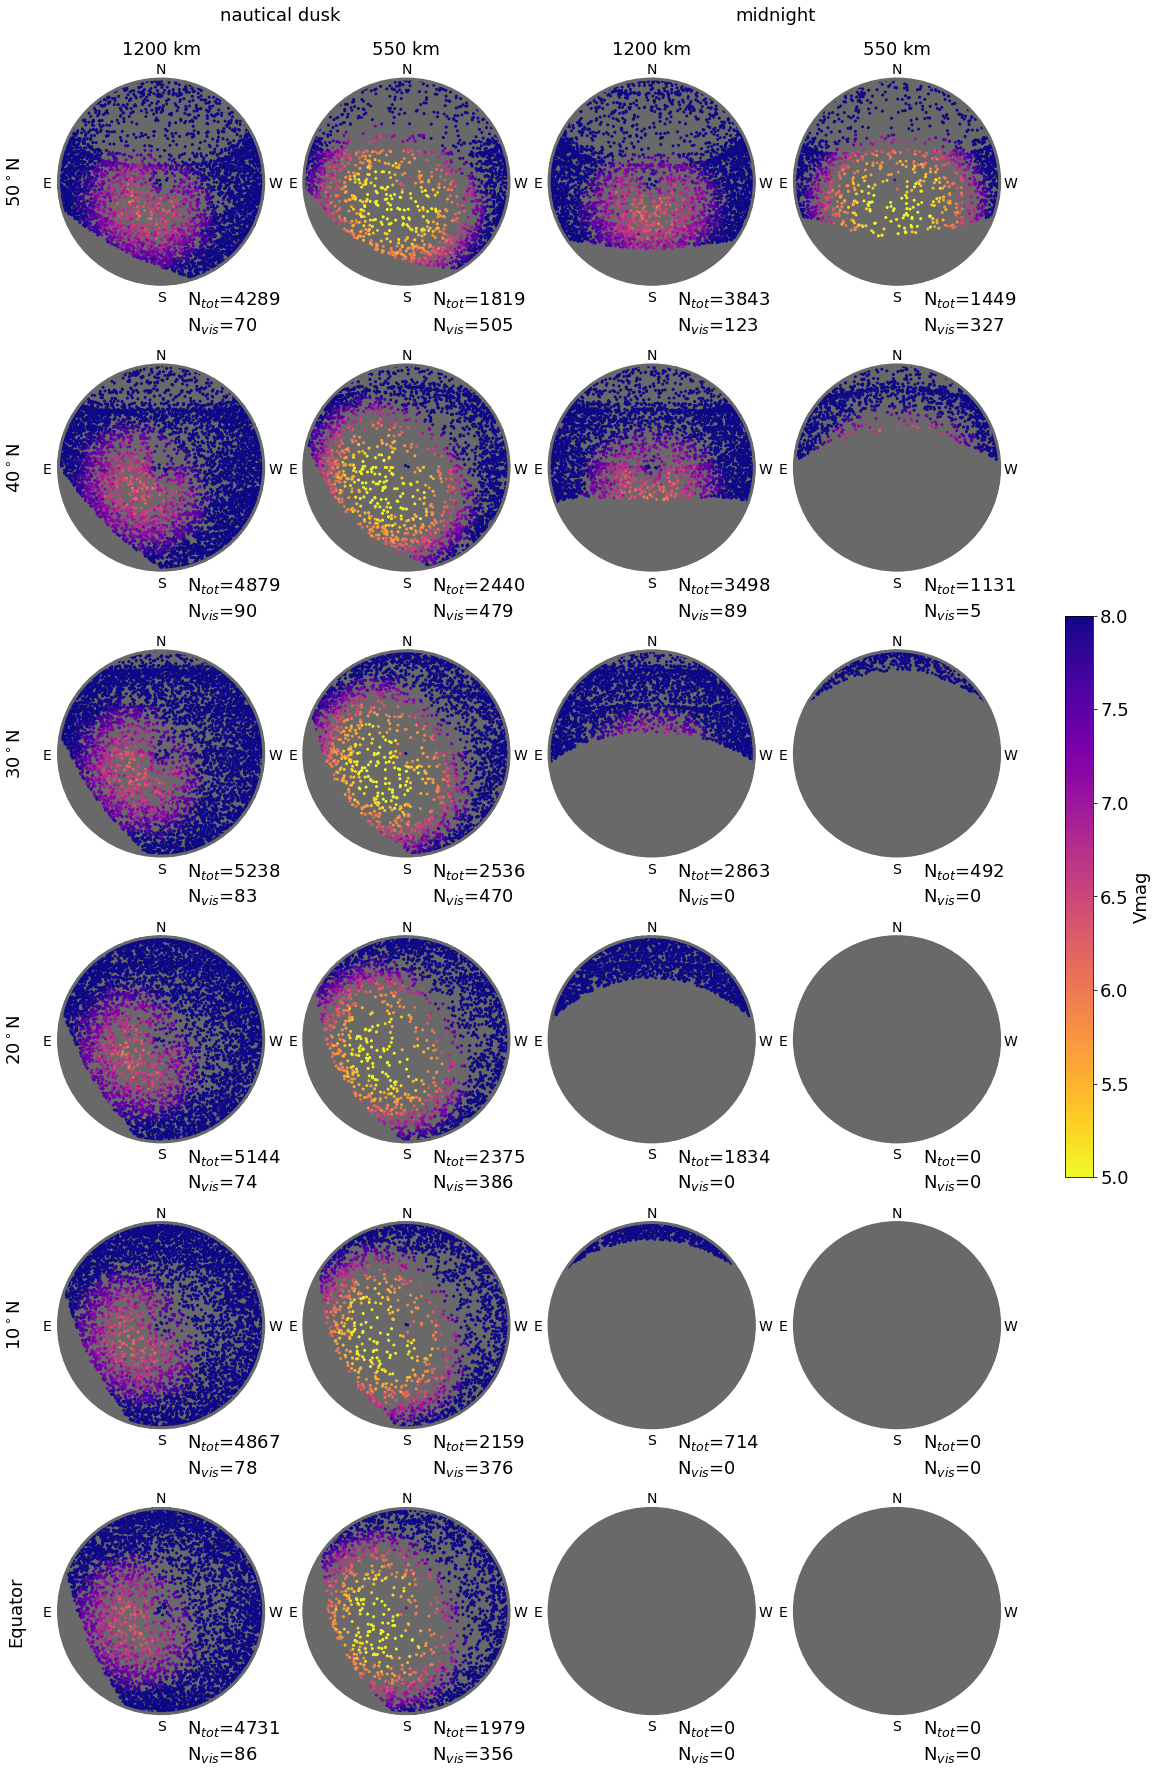

In [5]:
latitudes = [0,10,20,30,40,50]
latitudes.reverse()
fig, axs = plt.subplots(len(latitudes),4,figsize=(16,24), constrained_layout=True, squeeze=False)
month=3
v_lim=[5, 8]
# astronomical twilight: b`etween 12 and 18 degrees

for i, sims in enumerate([sims1200, sims550]):
    for j, latitude in enumerate(latitudes):
        lon = mega.length_of_night(month=month, latitude=latitude, p=12)
        hours = [-lon/2.,0.]
        #hours = [-3,0]
        for k, hour in enumerate(hours):
            xy, mag = mega.get_stereographic_data(sims, latitude=latitude, month=month, hour=hour, airmassCoeff=0.2, randomCoeff=0.2)

            ax = axs[j][i+k*2] 
            ax.set_aspect("equal")
            r_lim = 1.02
            ax.set_xlim(-r_lim,r_lim)
            ax.set_ylim(-r_lim,r_lim)

            # hide axes
            ax.get_xaxis().set_ticks([])
            ax.get_yaxis().set_ticks([])
            for s in ax.spines:
                ax.spines[s].set_visible(False)
            if j==0: 
                if i==0:
                    ax.text(0,1.24,"1200 km",horizontalalignment='center',fontsize=18)
                elif i==1:
                    ax.text(0,1.24,"550 km",horizontalalignment='center',fontsize=18)
            if i==0 and k==0: 
                if latitude==0.:
                    ax.text(-1.5,0,"Equator",verticalalignment='center',rotation='vertical',fontsize=18)   
                else:
                    ax.text(-1.5,0,"%d$^\circ$N"%latitude,verticalalignment='center',rotation='vertical',fontsize=18)


            # setup labels    
            r_labels = 1.11    
            for k, d in enumerate(["N","W","S","E"]):
                ax.text(r_labels*np.sin(k*np.pi/2.),r_labels*np.cos(k*np.pi/2.)-0.02, d, ha="center", va="center",fontsize=14)
            ax.text(0.25,-1.2,"N$_{tot}$=%d"%len(xy),fontsize=18) 
            ax.text(0.25,-1.45,"N$_{vis}$=%d"%len(xy[mag<6.5]),fontsize=18) 

            # background
            ax.add_collection(PatchCollection([plt.Circle((0, 0), 1)], zorder=-10, color="dimgray"))
            ax.add_collection(PatchCollection([plt.Circle((0, 0), 1)], zorder=3, edgecolor="dimgray", facecolor="none", lw=3))

            # plot
            im=ax.scatter(xy[:,0],xy[:,1],s=4, c=mag, cmap=cm,vmin=v_lim[0],vmax=v_lim[1])
# manually placing the labels because "matplotlib"        
fig.text(0.67,1.01,"midnight",horizontalalignment='center',fontsize=18)     
fig.text(0.24,1.01,"nautical dusk",horizontalalignment='center',fontsize=18)    

cb = fig.colorbar(im,ax=axs,shrink=1./3.)
cb.set_label(label="Vmag",size=18)
cb.ax.tick_params(labelsize=18)
plt.savefig("figure3.png",facecolor='white', transparent=False,dpi=200,bbox_inches='tight')